In [1]:
pwd

'C:\\Users\\Admin\\Jieun\\1016_deeplearning_from_scratch\\ch04_1018'

In [2]:
import numpy as np
from mnist import load_mnist
import pickle

<a href='https://benn.tistory.com/43'>피클 파일 다루기</a>

In [3]:
from commons.functions import softmax, sigmoid

In [4]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, flatten=True,
                                                     one_hot_label=False)
    return x_test, t_test

In [5]:
def init_network():
    with open("sample_weight.pkl", 'rb') as f: # 기존에 학습시킨 weight를 저장
        # pre_trained 데이터 가져다가 fine tuning을 함
        network = pickle.load(f)
    return network

<a href="https://wikidocs.net/22647">원 핫 인코딩</a>

In [6]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    return y

In [7]:
x, t = get_data()
network = init_network()
accuracy_cnt = 0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y) # 확률이 가장 높은 원소의 index를 얻는다
    if p==t[i]:
        accuracy_cnt += 1
print("정확도: " + str(float(accuracy_cnt)/len(x)))

정확도: 0.9352


<a href='https://www.youtube.com/watch?v=aircAruvnKk&list=PLZHQObOWTQDNU6R1_67000Dx_ZCJB-3pi'>신경망</a>

## 배치 처리

In [8]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [9]:
x.shape # 1000장의 이미지, 28*28=784

(10000, 784)

In [10]:
x[0].shape

(784,)

In [11]:
W1.shape

(784, 50)

In [12]:
print('w1 shape:', W1.shape)
print('w2 shape:', W2.shape)
print('w3 shape:', W3.shape)

w1 shape: (784, 50)
w2 shape: (50, 100)
w3 shape: (100, 10)


X(784), W1(784X50), W2(50,100), W3(100,10)
하나로 묶은 데이터를 배치라고 함.

In [13]:
x, t = get_data()
batch_size = 100 # 배치 크기
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 1차원이면 어떤 축으로 정할 필요가 없지만
    # 2차원이면 해당 축에서 가장 큰값의 index를 알려달라고 정해야 함.
    accuracy_cnt += np.sum(p==t[i:i + batch_size])
print("정확도: " + str(float(accuracy_cnt)/len(x)))

정확도: 0.9352


In [14]:
x, t = get_data()
batch_size = 1000 # 배치 크기
accuracy_cnt = 0
for i in range(0, len(x), batch_size):
    x_batch = x[i:i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1) # 1차원이면 어떤 축으로 정할 필요가 없지만
    # 2차원이면 해당 축에서 가장 큰값의 index를 알려달라고 정해야 함.
    accuracy_cnt += np.sum(p==t[i:i + batch_size])
print("정확도: " + str(float(accuracy_cnt)/len(x)))

정확도: 0.9352


## 손실함수
### 평균 제곱 오차 (Mean Squre Error)
$$ E = \frac{1}{2} \sum_{k}(y_{k} - t_{k})^2 $$

In [15]:
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)

In [16]:
t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1,0.05 , 0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
len(t) - len(y)

0

In [17]:
import numpy as np

In [18]:
mean_squared_error(np.array(y), np.array(t))

0.09750000000000003

In [19]:
y=[0.1,0.05 , 0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
mean_squared_error(np.array(y), np.array(t))

0.5975

## 교차 엔트로피 오차(Cross Entropy)
$$ -\sum_{k} t+{k} log y_{k} $$

- logistic entropy의 cross entropy와 다름?

- logistic entropy
<img src='images/losisticEntropy.jpg' />

<a href='https://www.philgineer.com/2021/10/31.html'>소프트맥스와 크로스 엔트로피</a> <br>
<a href='https://davinci-ai.tistory.com/28'>분류(Classification) 네트워크</a>

In [20]:
def cross_entropy_error(y, t):
    delta = 1e-7
    return -np.sum(t * np.log(y + delta)) # log의 값이 0이 되며 안되므로 약간의 오차 보정

In [21]:
t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1,0.05 , 0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [22]:
y=[0.1,0.05 , 0.1,0.0,0.05,0.1,0.0,0.6,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

<a href='https://blog.naver.com/PostView.nhn?blogId=syg7949&logNo=221861927747&parentCategoryNo=&categoryNo=41&viewDate=&isShowPopularPosts=true&from=search'>[딥러닝-keras] MultiClass Classification 사용하기</a>

In [23]:
from keras.datasets import reuters

In [24]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [25]:
print(len(train_data), len(test_data), train_data[0])

8982 2246 [1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


data가 주어지면 이게 결국은 숫자가 들어간 list로 구성되어있기 때문에 <br>
{숫자: 단어}로 된 dictionary를 이용해서 <br>
파일을 읽는다. <br>

In [26]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

## 데이터 전처리(data Pre-processiong)
데이터를 vector로 변환

In [27]:
import numpy as np

In [28]:
def vectorize_sequence(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1.
    return results

In [29]:
x_train = vectorize_sequence(train_data)
y_test = vectorize_sequence(test_data)

## multiclass label을 one-hot-encoding으로 변환

In [30]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

이렇게 하지 않고 케라스에서는 이를 내장함수로 제공

In [31]:
from keras.utils import to_categorical

In [32]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_lables = to_one_hot(test_labels)
one_hot_test_lables[:3, -1]

array([0., 0., 0.])

각 layer를 쌓는데 각 층은 이전의 layer에서 사용한 정보만 사용할 수 있으므로 한 layer가 필요한 정보를 누락하면 그 다음 layer은 그 data를 복원할 방법이 없기 때문에 이는 information bottleneck이 될 수 있기에 여기서는 class가 46개이므로 46보다 큰 갯수의 hidden unit을 선택할 것이다. 또한 binary에서는 sigmoid가 사용된 반면에 여기서는 softmax가 사용되었다. 또한 loss function도 다르게 사용되었는데 binary classification에서는 binary_crossentropy가 사용된 반면에 이 multiclass에서는 categorical_crossentoropy가 사용되었다. categorical_crossentoropy는 두 확률 분포 사이의 거리를 측정하는 것으로 네트워크가 출력한 학률분호와 진짜 label의 분포 사이의 거리를 나타낸다.

각 layer를 쌓는데 각 층은 이전의 layer에서 사용한 정보만 사용할 수 있으므로

한 layer가 필요한 정보를 누락하면 그 다음 layer은 그 data를 복원할 방법이 없기 때문에

이는 information bottleneck이 될 수 있기에

여기서는 class가 46개 이므로 46보다 큰 갯수의 hidden unit을 선택할 것이다. 

​

또한 binary에서는 sigmoid가 사용된 반면에

여기서는 softmax가 사용되었다

​

또한 loss function도 다르게 사용되었는데

binary classification에서는 binary_crossentropy가 사용된 반면에

이 multicalss에서는 categorical_crossentropy가 사용되었다.

​

categorical_crossentropy는 두 확률 분포 사이의 거리를 측정하는것으로 

네트워크가 출력한 확률분포와 진짜 label의 분포 사이의 거리를 나타낸다.

# 모델구성

In [33]:
from keras import models, layers

In [34]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [35]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [36]:
x_val = x_train[:1000]
print(x_train.shape) # (8982, 1000)
partial_x_train = x_train[1000:]
print(partial_x_train.shape) # (1246, 10000)

(8982, 10000)
(7982, 10000)


In [37]:
y_val = one_hot_train_labels[:1000]
print(y_val.shape)
partial_y_train = one_hot_train_labels[1000:]
print(partial_y_train)
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))
history_dic = history.history
history_dic.keys() # dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

(1000, 46)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
Epoch 1/20
16/16 [==============================] - 1s 38ms/step - loss: 3.0416 - accuracy: 0.4453 - val_loss: 2.0967 - val_accuracy: 0.6000
Epoch 2/20
16/16 [==============================] - 0s 18ms/step - loss: 1.6983 - accuracy: 0.6657 - val_loss: 1.4803 - val_accuracy: 0.6790
Epoch 3/20
16/16 [==============================] - 0s 18ms/step - loss: 1.2622 - accuracy: 0.7269 - val_loss: 1.2412 - val_accuracy: 0.7240
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 1.0339 - accuracy: 0.7744 - val_loss: 1.1235 - val_accuracy: 0.7550
Epoch 5/20
16/16 [==============================] - 0s 18ms/step - loss: 0.8704 - accuracy: 0.8084 - val_loss: 1.0517 - val_accuracy: 0.7640
Epoch 6/20
16/16 [==============================] - 0s 18ms/step - loss: 0.7386 - accuracy: 0.8376 - val_loss: 0.9841 - val_accu

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# plot 그리기

In [38]:
import matplotlib.pyplot as plt

In [39]:
loss= history.history['loss']
plt.clf()

<Figure size 640x480 with 0 Axes>

In [45]:
def vis(history,name) :
    plt.title(f"{name.upper()}")
    plt.xlabel('epochs')
    plt.ylabel(f"{name.lower()}")
    value = history.history.get(name)
    val_value = history.history.get(f"val_{name}",None)
    epochs = range(1, len(value)+1)
    plt.plot(epochs, value, 'b-', label=f'training {name}')
    if val_value is not None :
        plt.plot(epochs, val_value, 'r:', label=f'validation {name}')
    plt.legend(loc='upper center', bbox_to_anchor=(0.05, 1.2) , fontsize=10 , ncol=1)
    
def plot_history(history) :
    key_value = list(set([i.split("val_")[-1] for i in list(history.history.keys())]))
    plt.figure(figsize=(12, 4))
    for idx , key in enumerate(key_value) :
        plt.subplot(1, len(key_value), idx+1)
        vis(history, key)
    plt.tight_layout()
    plt.show()

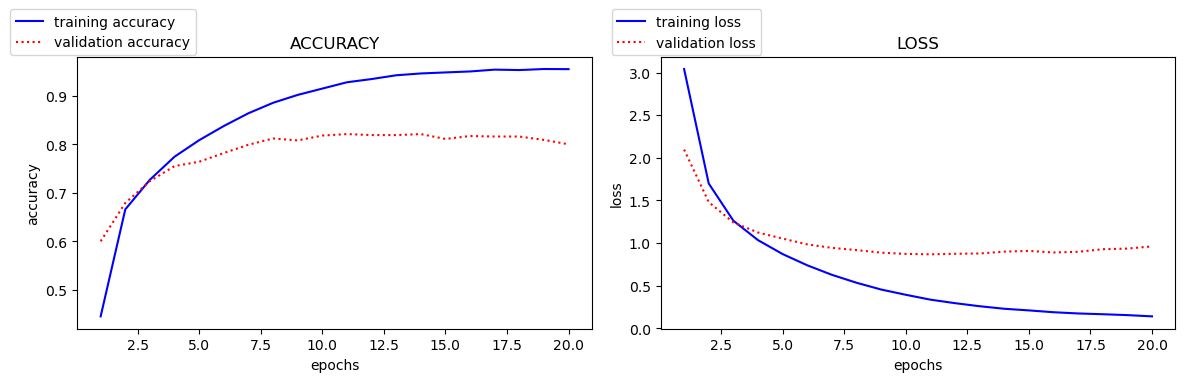

In [46]:
plot_history(history)

<a href='https://partrita.github.io/posts/CNN-with-KERAS/'>케라스 사용법</a> <br>
<a href='https://velog.io/@ljs7463/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-%ED%95%99%EC%8A%B5%EC%9D%84-%EC%9C%84%ED%95%9C-%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B-%EB%B6%84%EB%A6%ACtraintestvalidation'>validation 사용 이유</a>

In [53]:
def cross_entropy_error(y, t):  # batch 크기로 분할하여 처리
    if y.ndim == 1: # 입력 데이터가 1차원이면 2차원을 변형
        t = t.reshape(1, t.shape)
        y = y.reshape(1, y.shape)
    batch_size = y.shape[0]
    return -np.sum(t * np.log(y)) / batch_size

# 수치 미분

### 미분
$$ \frac{df(x)}{dx} = \lim_{h \rightarrow 0} \frac{f(x+h)-f(x)}{h} $$

In [128]:
# 나쁜 구현 예
def numerical_diff(f, x):
    h = 10e-50
    return (f(x+h)-f(x))/h

In [134]:
# 좋은 구현 예
def numerical_diff(f, x):
    h = 1e-4 # 0.000
    return (f(x+h)-f(h-x))/(2*h) # 중심차분, 중앙차분

$$ \frac{df(x)}{dx} = \lim_{h \rightarrow 0} \frac{f(x+h)-f(x-h)}{2 \times h} $$

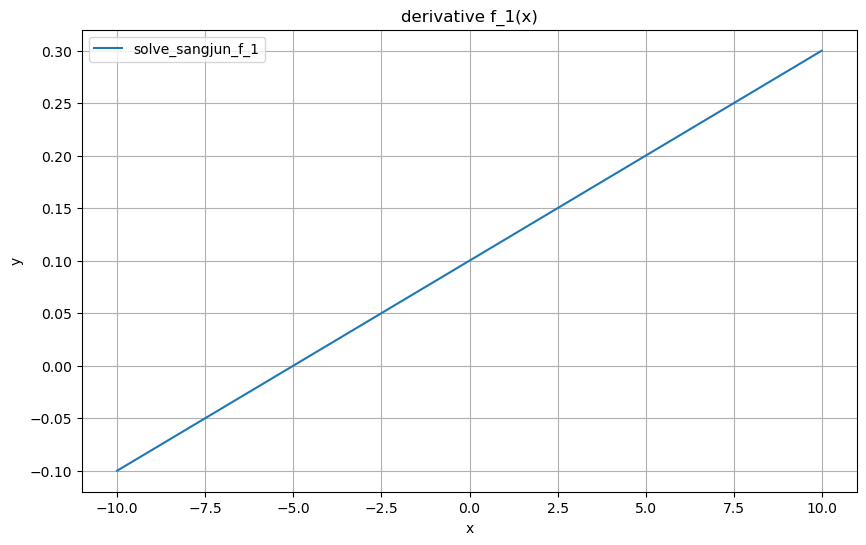

In [97]:
import numpy as np

def numeral_diff_2(f,x):
    h = 1e-4
    return (f(x+h) - f(x-h))/(2*h)

def f_1(x) : return 0.01*x**2 + 0.1*x
x = np.arange(-10,10,0.01)
y_prime = numeral_diff_2(f_1, x)


plt.figure(figsize=(10, 6))
plt.plot(x, y_prime, label="solve_sangjun_f_1")
plt.xlabel("x")
plt.ylabel("y")
plt.title("derivative f_1(x)")
plt.legend()
plt.grid()
plt.show()

In [98]:
# 심파이로 최대 최소값 증명
from sympy import *
x,y = symbols('x y')
f_ = 0.01*x**2 + 0.1*x
y_ = diff(f_,x)
result = y_.subs(x,10)
print(result)
result_2 = y_.subs(x,-10)
print(result_2)

0.300000000000000
-0.100000000000000


In [111]:
def f_1(x):
    return 0.01 * x**2 + 0.1 * x

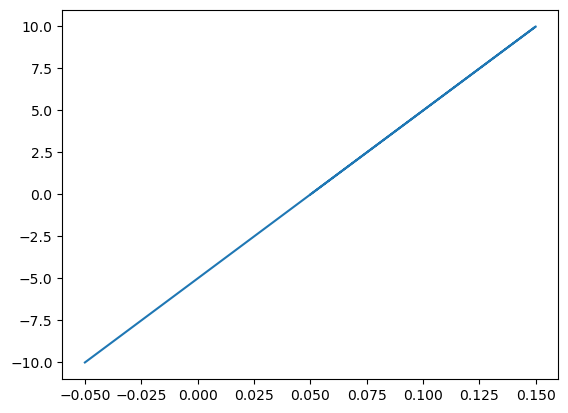

In [115]:
x = np.array([-10,10,0.01])
y = numerical_diff(f_1, x)
plt.plot(a, x)
plt.show()

# 편미분

$$ f(x_{0}, x_{1}) = x_{0}^2 + x_{1}^2 $$

In [108]:
def f_2(x):
    return x[0]**2 + x[1]**2

In [132]:
def f_tmp1(x0):
    return x0*x0 + 4.0**2.0

In [135]:
numerical_diff(f_tmp1, 3.0)

6.00000000000378

문2)  $$ x_{0} = 3, x_{1} = 4일 때 x_{1}에 대한 편미분 (\frac{\partial f}{\partial x_{1}})를 구하세요 $$

# 기울기

In [177]:
def numerical_gradient(f, x):
    h = 1e-4
    grad = np.zeros_like(x) # x와 형상이 같은 배열 생성
    for idx in range(x.size):
        tmp_val = x[idx]
        # f(x+h) 계산    
        # 여기 채우세요, x의 idx에 해당하는 곳에 tmp_val의 값에 h만큼 증가한 값 저장
        # f(x) 호출 결과를 fxh1에 저장
        x[idx] = tmp_val + h
        fxh1 = f(x)
        # f(x-h) 계산
        # 여기 채우세요, x의 idx에 해당하는 곳에 tmp_val의 값에 h만큼 감소한 값 저장
        # f(x) 호출 결과를 fxh2에 저장
        x[idx] = tmp_val - h
        fxh2 = f(x)
        grad[idx] = (fxh1 - fxh2) / (2*h)
    return grad

$$ f(x_{0}, x_{1}, x_{2}) = x_{0}^2 + x_{1}^2 + x_{2}^2 $$
$$ \nabla f(x_{0},x_{1},x_{2}) = (\frac{\partial f}{\partial x_{0}}\frac{\partial f}{\partial x_{1}}\frac{\partial f}{\partial x_{2}} ) $$

In [181]:
numerical_gradient(f_2, np.array([3.0, 4.0])) # 6,8

array([6., 8.])

In [182]:
numerical_gradient(f_2, np.array([0.0, 2.0])) # 0,2

array([0., 4.])

In [183]:
numerical_gradient(f_2, np.array([2.0, 0.0])) # 4,0

array([4., 0.])

In [55]:
np.float32(1e-50)

0.0

In [51]:
t=[0,0,1,0,0,0,0,0,0,0]
y=[0.1,0.05 , 0.6,0.0,0.05,0.1,0.0,0.1,0.0,0.0]
cross_entropy_error(np.array(y), np.array(t))

TypeError: 'tuple' object cannot be interpreted as an integer